# Exercises in R

In [1]:
# Import required packages
library("ggplot2")
library("dplyr")
library("xlsx")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# Read the excel data
df = xlsx::read.xlsx('obama-approval-ratings.xls', sheetIndex = 1, stringsAsFactors = FALSE)

## Bar chart - R


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



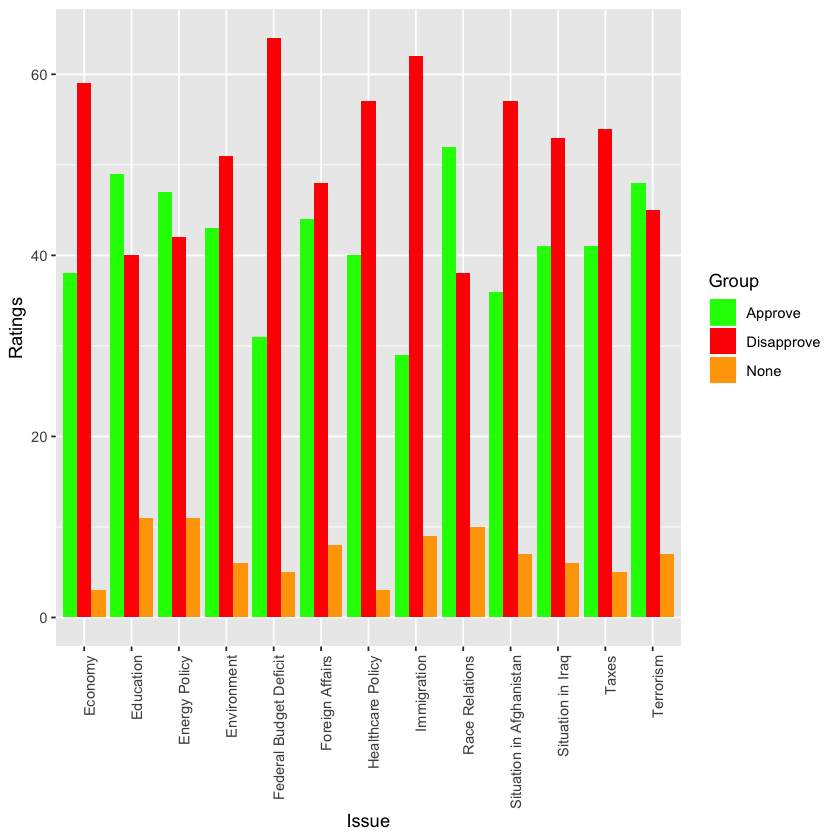

In [3]:
library(data.table)
library(ggplot2)
res <- as.data.frame(df)

data = df %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

colors <- c("green", "red", "orange")
color_scale <- scale_fill_manual(name = "Group", values = colors)

# Plot stacked
ggplot2::ggplot(data = data, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity', position="dodge") + 
    ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggplot2::scale_fill_manual(name = "Group", values = colors)


## Bar chart - R

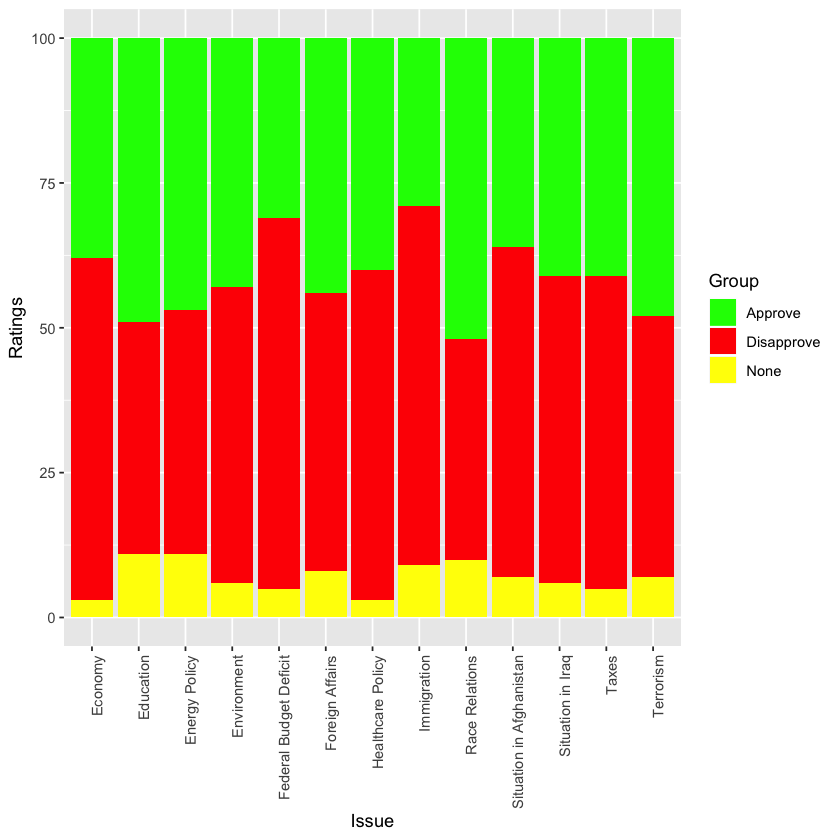

In [4]:
library(data.table)
library(ggplot2)
res <- as.data.frame(df)

data = df %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

colors <- c("green", "red", "yellow")
color_scale <- scale_fill_manual(name = "Group", values = colors)

# Stacked bar plot
ggplot2::ggplot(data = data, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggplot2::scale_fill_manual(name = "Group", values = colors)

## Pie chart - R

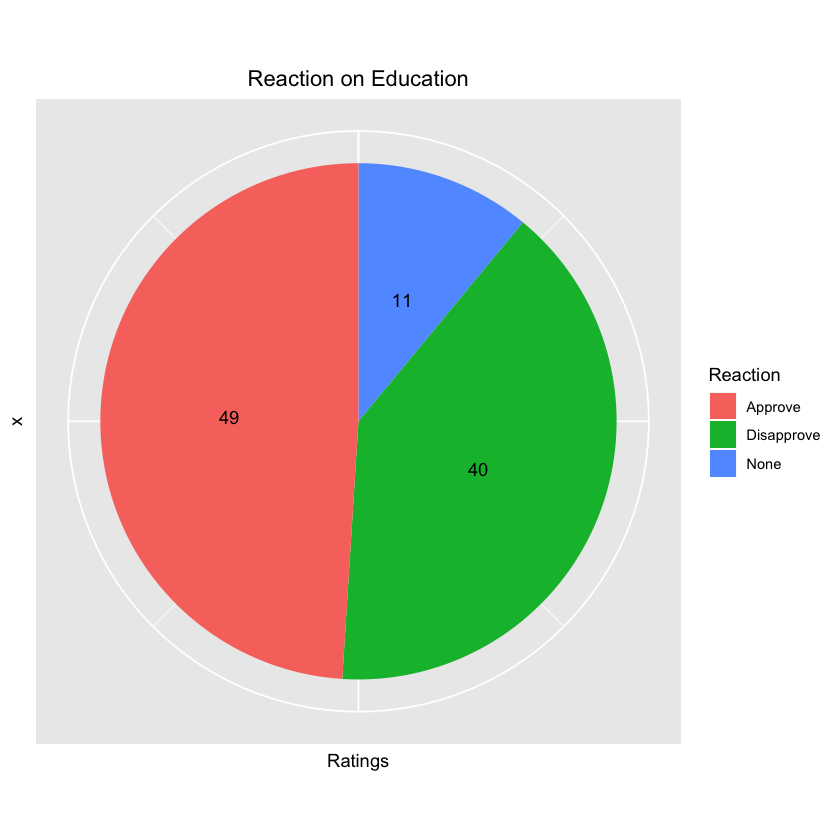

In [5]:
# Lets plot a Pie chart for Reaction on Education issue
colors <- c("green", "red", "orange")
color_scale <- scale_fill_manual(name = "Group", values = colors)

data %>%
    dplyr::filter(Issue=='Education') %>%
    ggplot2::ggplot(ggplot2::aes(x="", y=Ratings, fill=Reaction))+
        ggplot2::geom_bar(width = 1, stat = 'identity') +
        ggplot2::coord_polar('y', start=0) + 
        ggplot2::geom_text(aes(label = Ratings), position = position_stack(vjust = 0.5)) +
        ggplot2::ggtitle(label = 'Reaction on Education') +
        ## Bar chart - R +
        ggplot2::theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust = 0.5))

## Donut chart - R

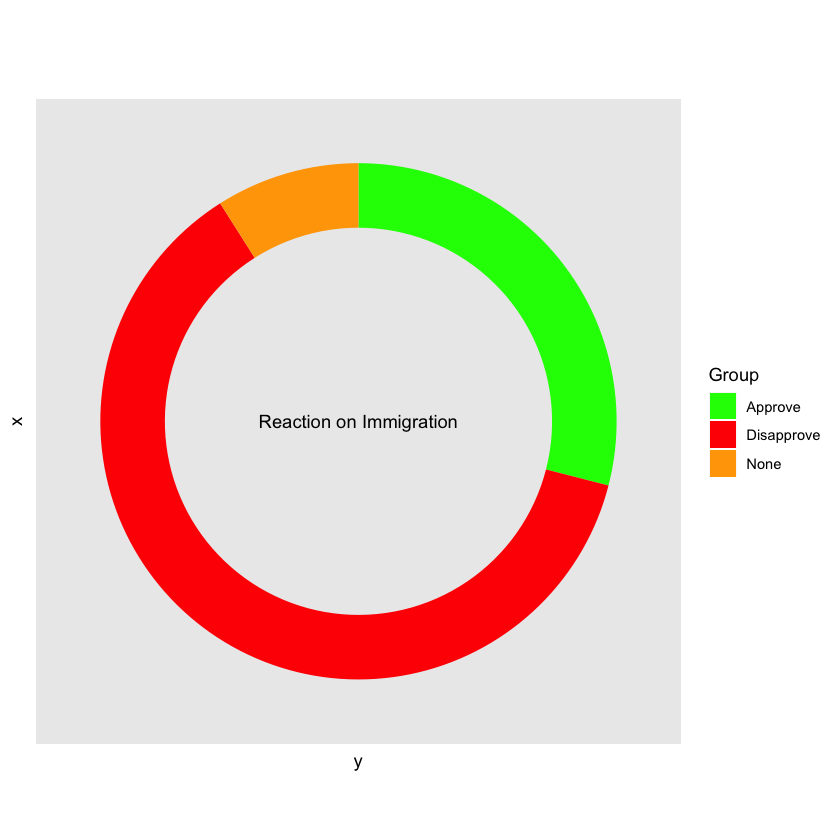

In [6]:
#Lets create a donut chart for Reation on Immigration issue
data %>%
    dplyr::filter(Issue=='Immigration') %>%
    dplyr::mutate(ymax=cumsum(Ratings),
                  ymin=c(0,ymax[1:length(ymax)-1])) %>%
    ggplot2::ggplot(ggplot2::aes(fill=Reaction, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
         ggplot2::geom_rect() +
         ggplot2::scale_fill_manual(name = "Group", values = colors) +
         ggplot2::coord_polar(theta='y') +
         ggplot2::xlim(c(0, 4)) +
         ggplot2::annotate('text', x = 0, y = 0, label = 'Reaction on Immigration') +
         ggplot2::theme(panel.grid=element_blank(), 
            axis.text.x=element_blank(),
            axis.text.y=element_blank(),
            axis.ticks=element_blank()) +
         ggplot2::labs(title='')